# Usual steps for ML modeling
1) Gathering the data from various sources

2) Data preprocessing( Remove missing or any outliers values, scaling , etc)

3) Separating data into features and labels

4) Training the model

5) Testing & scoring

6) prediction or classification

# Simple Linear Regression
Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable.

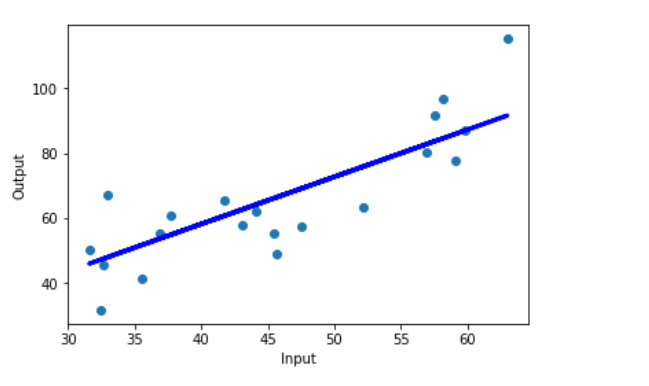

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

Y(pred) = b0 + b1*x


The values b0 and b1 must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.

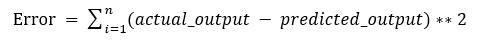

# For a model with one predictor
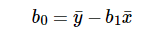


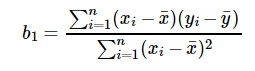

# Objective: Create a ML model that can accept one input of "Opening price" and predict what will the price of apple share at the end of the day

In [2]:
#Load the data. See the first 5 rows 

import pandas as pd
import plotly.express as px

df=pd.read_csv(r"/home/harshit/Desktop/IntroductionToML/Dataset/AAPL.csv")


#first 5 rows of loaded data frame
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,27.242500,27.652500,27.207500,27.254999,25.350115,117630000
1,2016-04-12,27.334999,27.625000,27.165001,27.610001,25.680305,108929200
2,2016-04-13,27.700001,28.084999,27.700001,28.010000,26.052345,133029200
3,2016-04-14,27.905001,28.097500,27.832500,28.025000,26.066298,101895600
4,2016-04-15,28.027500,28.075001,27.432501,27.462500,25.543112,187756000


## step 2: PRE_PROCESS THE DATA

## what to check?

    a) Check for null values
    b) verify correlation
    c) plot a graph to verify correlation

In [12]:
df[      ['Open', 'Close']      ].corr()

,Open,Close
Open,1.000000,0.999409
Close,0.999409,1.000000


In [2]:
df.isna().sum() #check the total number of missing values in each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
px.scatter(
    data_frame=df,
    x="Open",
    y="Close"
)

# Feature and Label

We will select our dependent variable(target) and independent variable(feature)

In [26]:
#target means label

feature=df [['Open',"High"]]

label=df [["Close"]]

### step 4: Splitting training & testing data

In [27]:
#divide the available data into training and testing set!

#from sklearn library's model_selection module, import a function called train_test_split




from sklearn.model_selection import train_test_split

#### 2 ways to import something in python

### first: import the entire library at once. e.g: import pandas as pd. pd.read_csv

#### second: import only the required functionality e.g: from pandas import read_csv.          read_csv()

In [28]:
0.8 * 1258

1006.4000000000001

In [29]:
df[    ["Open","Close"]   ]

,Open,Close
0,27.242500,27.254999
1,27.334999,27.610001
2,27.700001,28.010000
3,27.905001,28.025000
4,28.027500,27.462500
...,...,...
1253,123.660004,123.000000
1254,123.870003,125.900002
1255,126.500000,126.209999
1256,125.830002,127.900002



    x_train      y_train
    Open           Close
0    27.242500	27.254999
1	27.334999	27.610001
2	27.700001	28.010000
3	27.905001	28.025000
4	28.027500	27.462500

























#########################################################
          Open     Close
         x_test      y_test 
126.     500000	126.209999
1256	125.830002	127.900002
1257	128.949997	130.360001

In [30]:
# # feature: 
#             training features, training target (80% of data)

# # target:
#         testing features, testing target (20% of data)



#x_train: open prices to be used for training
#y_train : close prices corresponding to x_train opening prices

#x_test : open prices to be used for testing
#y_test : close prices corresponding to x_test opening prices

x_train, x_test,y_train,y_test =  train_test_split( feature,  label,   test_size=0.2  )

In [49]:

            #Open training      Close training           
print(     x_train.shape,     y_train.shape    )
print(     x_test.shape,     y_test.shape    )

(1006, 1) (1006, 1)
(252, 1) (252, 1)


# approaches to understanding ML problem

a) statistical approach: 

  Y means : Close price
  X means : Open price

  Y = factor * X +  Error!!
  
  
  Y = M * X  + C(offset!)

  close = slope * Open + y-intercept


b) Visual perspective: FIND Y COORDINATE OF DATA POINT BASED ON BEST FITTING LINE



c) layman's approach: if i change opening price by a factor, by how much closing 
                     price changes?

#### Step 5: Training the model : LinearRegression:   Y=M*X + C straight line

In [ ]:
X1                          X2                  X3                  X4
Last_traded_price       Equity_Value         Cash_Equivalence  Simple_debt


Y = X1 * M1  = X2 * M2 + X3 * M3 + X4 * M4 + c

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model=LinearRegression() #model

In [52]:
model.fit(x_train,y_train) #training step

LinearRegression()

In [53]:
model.coef_             #value for m

array([[0.99778269]])

In [54]:
model.intercept_          #slope intercept c

array([0.15489603])

In [55]:
#calculate according to thhe formula to verify
#wednesday:  120

120 * 0.9977 +  0.15

119.87400000000001

In [39]:
#TEST THE MODEL!!!!!!


"""

1) model will be fed testing input(x_test)
2) model will make a prediction for each value in x_test( call this predicted_y)
3)predicted_y with y_test (actual testing labels)
4) accordingly a score is obtained
"""

model.score(x_test,y_test)


0.998582740411965

In [40]:
y_predicted= model.predict(x_test) #pass only testing feature



# y_predicted

In [41]:
#create a predicted column
predicted=pd.DataFrame(y_predicted , columns=['Predicted']).reset_index(drop=True)

In [42]:
y_test = y_test.reset_index(drop=True) #alignment of old values need to match with predicted

In [43]:
pd.concat([predicted,y_test],axis=1 )

,Predicted,Close
0,50.807333,50.167500
1,96.937321,92.845001
2,35.256891,35.172501
3,55.282390,55.105000
4,135.434275,133.720001
...,...,...
247,135.883275,136.910004
248,28.382169,28.045000
249,29.287656,29.245001
250,70.568421,74.702499


In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predicted,y_test)

1.2798351421644274